# The dataset for this competition is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#  imports and fill our 5 tables that instacart provided as dataframes into a dictionary called data

In [5]:
files = ['aisles.csv','departments.csv', 'orders.csv','products.csv', 'order_products__prior.csv']
data = {}

for f in files:
    d = pd.read_csv('C:\\Users\\maged\Desktop\\python & pandas\\project/{0}'.format(f))
    data[f.replace('.csv','')] = d
    
    
products= data['products']
order_products_prior = data['order_products__prior']
departments = data['departments']
orders = data['orders']
ailes = data['aisles']

OPPsample = order_products_prior.sample(n=3000000)

merged = products.merge(OPPsample,on='product_id',how='inner')
merged = departments.merge(merged,on='department_id',how='inner')
merged = orders.merge(merged,on='order_id',how='inner')

merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id,department,product_id,product_name,aisle_id,add_to_cart_order,reordered
0,2398795,1,prior,2,3,7,15.0,7,beverages,196,Soda,77,1,1
1,3367565,1,prior,6,2,7,19.0,7,beverages,196,Soda,77,1,1
2,3367565,1,prior,6,2,7,19.0,19,snacks,10258,Pistachios,117,3,1
3,2295261,1,prior,9,1,16,0.0,19,snacks,10258,Pistachios,117,5,1
4,2168274,2,prior,1,2,11,NaN,13,pantry,12000,Baked Organic Sea Salt Crunchy Pea Snack,72,4,0


# continue by separating our big merged table into separate departmental tables

In [6]:
department_list = list(departments.department)

department_data = {}

for n in department_list:
    d = merged.loc[merged['department']=='{0}'.format(n)]
    department_data['{0}'.format(n)] = d
    
list(department_data)

['frozen',
 'other',
 'bakery',
 'produce',
 'alcohol',
 'international',
 'beverages',
 'pets',
 'dry goods pasta',
 'bulk',
 'personal care',
 'meat seafood',
 'pantry',
 'breakfast',
 'canned goods',
 'dairy eggs',
 'household',
 'babies',
 'snacks',
 'deli',
 'missing']

# now create a dictionary for the first part of our analysis that looks at products by volume of purchases

# Take each department table in our department_data dictionary, group it by product_name to get quantity purchased of each unique product


In [8]:
department_product_data = {}

for n in department_list:
    d = department_data['{0}'.format(n)].groupby(['product_name']).count().reset_index()
    department_product_data['{0}'.format(n)] = d
    department_product_data['{0}'.format(n)] = department_product_data['{0}'.format(n)].iloc[:,0:2]
    department_product_data['{0}'.format(n)].columns = ['product_name','quantity']
    department_product_data['{0}'.format(n)] = department_product_data['{0}'.format(n)].sort_values('quantity',ascending=False)
    department_product_data['{0}'.format(n)].reset_index(inplace=True)
    department_product_data['{0}'.format(n)] = department_product_data['{0}'.format(n)].iloc[:,1:4]

# check random table in department_product_data

In [9]:
department_product_data['babies'].head()

,product_name,quantity
0,Baby Food Stage 2 Blueberry Pear & Purple Carrot,859
1,Spinach Peas & Pear Stage 2 Baby Food,717
2,Gluten Free SpongeBob Spinach Littles,653
3,Broccoli & Apple Stage 2 Baby Food,634
4,Free & Clear Unscented Baby Wipes,555


# For the next part of our analysis we will look at how order_hour_of_day varies by purchases in each department

# we are interested in from our big merged table and make a new merged table with only those columns

In [10]:
time_columns = ['order_id','order_hour_of_day','department','product_name']

time_merged = pd.DataFrame(merged,columns=time_columns)
time_merged.head()

,order_id,order_hour_of_day,department,product_name
0,2398795,7,beverages,Soda
1,3367565,7,beverages,Soda
2,3367565,7,snacks,Pistachios
3,2295261,16,snacks,Pistachios
4,2168274,11,pantry,Baked Organic Sea Salt Crunchy Pea Snack


# Next we create a dictionary for the second part of our analysis called department_time_data 

# group by order_hour_of_day to get quantity of products of ordered for each hour of the day

In [11]:
columns=['Order hour of day','Quantity'] #columns to rename to

department_time_data = {}

for n in department_list:
    d = time_merged.loc[time_merged['department']=='{0}'.format(n)] # Insert data from time_merged table into our new dictionary per each department
    department_time_data['{0}'.format(n)] = d
    department_time_data['{0}'.format(n)] = department_time_data['{0}'.format(n)].groupby('order_hour_of_day').count()
    department_time_data['{0}'.format(n)].reset_index(inplace=True)
    department_time_data['{0}'.format(n)] = department_time_data['{0}'.format(n)][department_time_data['{0}'.format(n)].columns[0:2]]
    department_time_data['{0}'.format(n)].columns = columns

# check random table in department_time_data

In [12]:
department_time_data['alcohol']

,Order hour of day,Quantity
0,0,48
1,1,32
2,2,17
3,3,17
4,4,24
5,5,28
6,6,68
7,7,193
8,8,482
9,9,954


# we need to address the NaN values in that column

In [13]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


# make the the days_since_reorder dictionary

In [14]:
pd.isnull(orders['days_since_prior_order']).sum()

206209

# Check the unique values in that column to make sure that all numbers 0-30 are accounted for before removing the NaN rows

In [15]:
orders['days_since_prior_order'].unique()

array([nan, 15., 21., 29., 28., 19., 20., 14.,  0., 30., 10.,  3.,  8.,
       13., 27.,  6.,  9., 12.,  7., 17., 11., 22.,  4.,  5.,  2., 23.,
       26., 25., 16.,  1., 18., 24.])

In [16]:
orders = orders.dropna()

# Next, let's only take columns that we need for this analysis and put that data into a new table called reorder_merged

In [17]:
reorder_columns = ['order_id','product_id','days_since_prior_order','department']
reorder_merged = pd.DataFrame(merged,columns=reorder_columns)

# Do the same thing for the reorder analysis that we did for the previous variables this time grouping by days_since_prior_order which will give us the quantity of purchases that had an order_id with the same days_since_prior_order value

In [18]:
columns2 = ['Days since prior order','Quantity'] # columns to rename to

department_reorder_data = {}

for n in department_list:
    d = reorder_merged.loc[reorder_merged['department']=='{0}'.format(n)]
    department_reorder_data['{0}'.format(n)] = d
    department_reorder_data['{0}'.format(n)] = department_reorder_data['{0}'.format(n)].groupby('days_since_prior_order').count()
    department_reorder_data['{0}'.format(n)].reset_index(inplace=True)
    department_reorder_data['{0}'.format(n)] = department_reorder_data['{0}'.format(n)][department_reorder_data['{0}'.format(n)].columns[0:2]]
    department_reorder_data['{0}'.format(n)].columns = columns2

# check table in department_reorder_data

In [19]:
department_reorder_data['produce']

,Days since prior order,Quantity
0,0.0,11504
1,1.0,25250
2,2.0,40883
3,3.0,52799
4,4.0,58302
5,5.0,60098
6,6.0,70286
7,7.0,96788
8,8.0,53321
9,9.0,32479


# we have all of our data in the right format for all three modes of analysis, lets look at the first one: quantity of products purchased

# We'll start by defining a function that plots the top ten products given a specific department

In [22]:
def toptenplot(name):
    p = sns.cubehelix_palette(10, start=0.6,dark=0.5, rot=1,light=0.8,reverse=True)
    plot = sns.barplot(palette = p,y='product_name',x='quantity',data=department_product_data['{0}'.format(name)].head(n=10))
    sns.plt.title('{0}'.format(name))
    plot.set(xlabel='Quantity',ylabel='Product Name')

AttributeError: module 'seaborn' has no attribute 'plt'

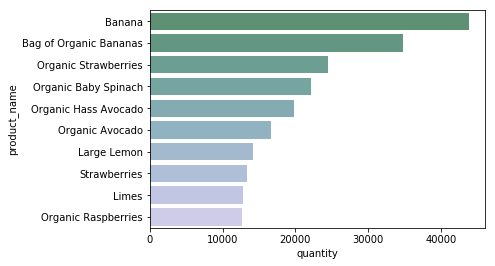

In [23]:
toptenplot('produce')

AttributeError: module 'seaborn' has no attribute 'plt'

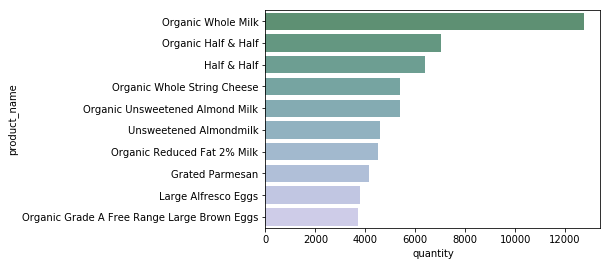

In [24]:
toptenplot('dairy eggs')

AttributeError: module 'seaborn' has no attribute 'plt'

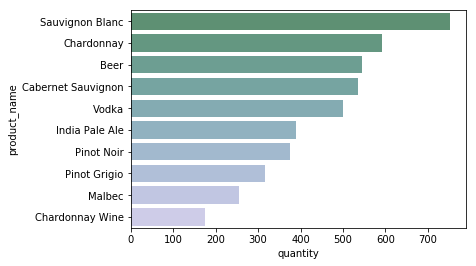

In [25]:
toptenplot('alcohol')

# the second part of our analysis:hour of day that products are purchased

# stack all of the department tables in the department_time_data dictionary onto one line graph and see what we get

In [27]:
department_time_norm = {}

for n in department_list:
    #calculate normalized quantity
    q = department_time_data['{0}'.format(n)]['Quantity']
    q_norm = (q-q.mean())/(q.max()-q.min())
    
    #copy "department_time_data" to "department_time_norm"
    d = department_time_data['{0}'.format(n)]
    department_time_norm['{0}'.format(n)] = d
    
    #replace the quantity with our new normalized quantity "q_norm"
    department_time_norm['{0}'.format(n)]['Quantity']=q_norm

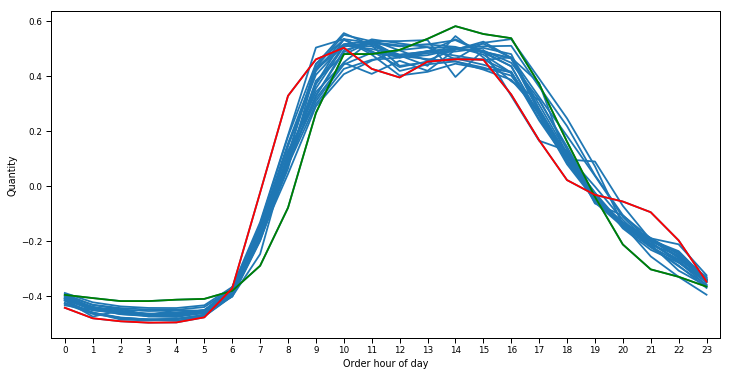

In [28]:
paper_rc = {'lines.linewidth': 1}                  
sns.set_context("paper", rc = paper_rc)
plt.figure(figsize=(12, 6))
plt.ylabel('Normalized Quantity')

for n in department_list: 
    sns.pointplot(x='Order hour of day',y='Quantity',data=department_time_norm['{0}'.format(n)],markers='',linestyles='-')

sns.pointplot(x='Order hour of day',y='Quantity',data=department_time_norm['alcohol'],markers='',linestyles='-',color = 'g')
sns.pointplot(x='Order hour of day',y='Quantity',data=department_time_norm['babies'],markers='',linestyles='-',color = 'r')

# Now onto the third part of our analysis: days since reorder

In [29]:
department_reorder_norm = {}

for n in department_list:
    #calculate normalized quantity
    q = department_reorder_data['{0}'.format(n)]['Quantity']
    q_norm = (q-q.mean())/(q.max()-q.min())
    
    #copy "department_data" to "department_data_norm"
    d = department_reorder_data['{0}'.format(n)]
    department_reorder_norm['{0}'.format(n)] = d
    
    #replace the quantity with our new normalized quantity "q_norm"
    department_reorder_norm['{0}'.format(n)]['Quantity']=q_norm

In [30]:
department_reorder_norm['produce']

,Days since prior order,Quantity
0,0.0,-0.162782
1,1.0,-0.013837
2,2.0,0.155555
3,3.0,0.284671
4,4.0,0.344299
5,5.0,0.363760
6,6.0,0.474152
7,7.0,0.761315
8,8.0,0.290327
9,9.0,0.064493


# alert its alcohol and babies again

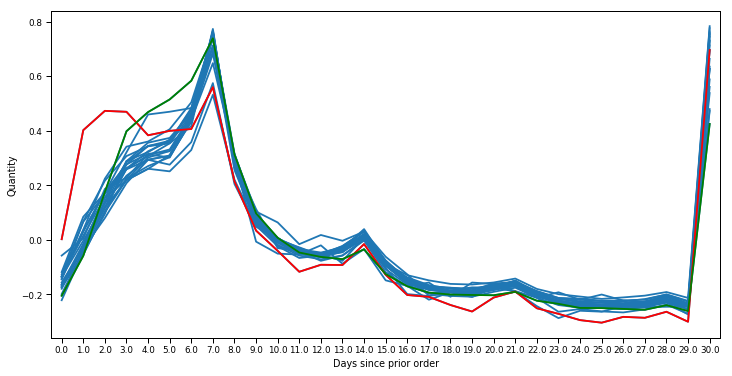

In [31]:
paper_rc = {'lines.linewidth': 1}                  
sns.set_context("paper", rc = paper_rc)
plt.figure(figsize=(12, 6))
plt.ylabel('Normalized Quantity')

for n in department_list:
    sns.pointplot(x='Days since prior order',y='Quantity',data=department_reorder_norm['{0}'.format(n)],markers='',linestyles='-')
    
sns.pointplot(x='Days since prior order',y='Quantity',data=department_reorder_norm['alcohol'],markers='',linestyles='-',color = 'r')
sns.pointplot(x='Days since prior order',y='Quantity',data=department_reorder_norm['babies'],markers='',linestyles='-',color = 'g')